## Self Organising Maps Assignment
``` Aditya Goel IRM2016003 ```

### **Library Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import math

In [2]:
# input_ = 2*(np.random.ranf((1500,2))-0.5)
input_ = np.random.uniform(-1, 1, (1500, 2))
print(input_.shape)

(1500, 2)


### **Initialization**

In [3]:
# Hyperparameters

lr = 0.5
x, y = 10, 10 # dimensions of Map
sigma = 1.   # spread of neighborhood
epochs = 50000
decay_param = epochs/2

In [4]:
activation_map = np.zeros((x, y))
weights = 2*(np.random.ranf((x, y, input_.shape[1]))-0.5)

# Used to evaluate neigborhood region
neigx = np.arange(x)
neigy = np.arange(y)

print(weights.shape)

(10, 10, 2)


#### **Helper Functions**

In [5]:
def decay_lr_sigma(iteration):
  lr_ = lr/(1+iteration/decay_param)
  sigma_ = sigma/(1+iteration/decay_param)

  return lr_, sigma_

In [6]:
def get_winner_neuron(x):
  s = np.subtract(x, weights) # x - w
  it = np.nditer(activation_map, flags=['multi_index'])
  while not it.finished:
      activation_map[it.multi_index] = np.linalg.norm(s[it.multi_index])  # || x - w ||
      it.iternext()

  return np.unravel_index(activation_map.argmin(), activation_map.shape)

In [7]:
def update_weights(win_neuron, inputx, iteration):
  # decay learning rate and sigma
  lr_, sigma_ = decay_lr_sigma(iteration)

  # get neighborhood about winning neuron (Mexican hat function)
  denom = 2*np.pi*(sigma_**2)
  ax = np.exp(-1*np.square(neigx-win_neuron[0]) / denom)
  ay = np.exp(-1*np.square(neigy-win_neuron[1]) / denom)

  neighborhood = np.outer(ax, ay)

  it = np.nditer(neighborhood, flags=['multi_index'])
  while not it.finished:
      weights[it.multi_index] += lr_*neighborhood[it.multi_index]*(inputx-weights[it.multi_index])
      it.iternext()

### **Training**

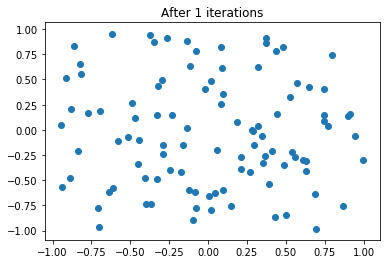

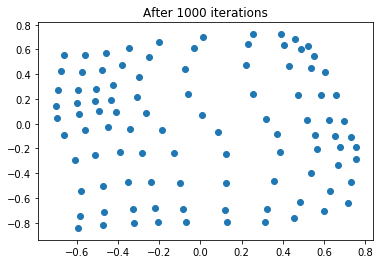

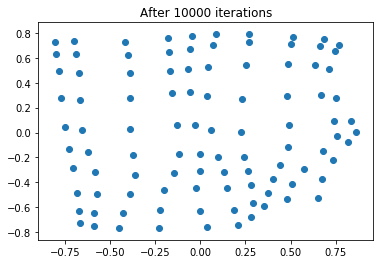

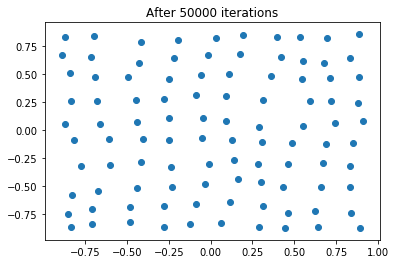

In [8]:
for epoch in tqdm(range(1, epochs+1)):
  np.random.shuffle(input_)
  idx = np.random.randint(0, input_.shape[0])
  win_neuron = get_winner_neuron(input_[idx])
  update_weights(win_neuron, input_[idx], epoch)

  if epoch==1 or epoch==100==0 or epoch==1000 or epoch==10000 or epoch==50000:
    plot_x = []
    plot_y = []

    for i in range(weights.shape[0]):
      for j in range(weights.shape[1]):
        plot_x.append(weights[i][j][0])
        plot_y.append(weights[i][j][1])

    plt.title('After '+str(epoch)+' iterations')
    plt.scatter(plot_x, plot_y)
    plt.show()
    plt.close()

### **Testing on inputs**

In [9]:
test_inputs = np.array([[0.1, 0.8], [0.5, -0.2], [-0.8, -0.9], [-0.6, 0.9]])
print(test_inputs.shape)

(4, 2)


The plots below depict the working of our SOM on test inputs

All the 10x10 neurons are represented by red color. The nearest neuron which is activated by the test input is shown with green color. Also the euclidean distances between activated neurons and test inputs are shown in the plots

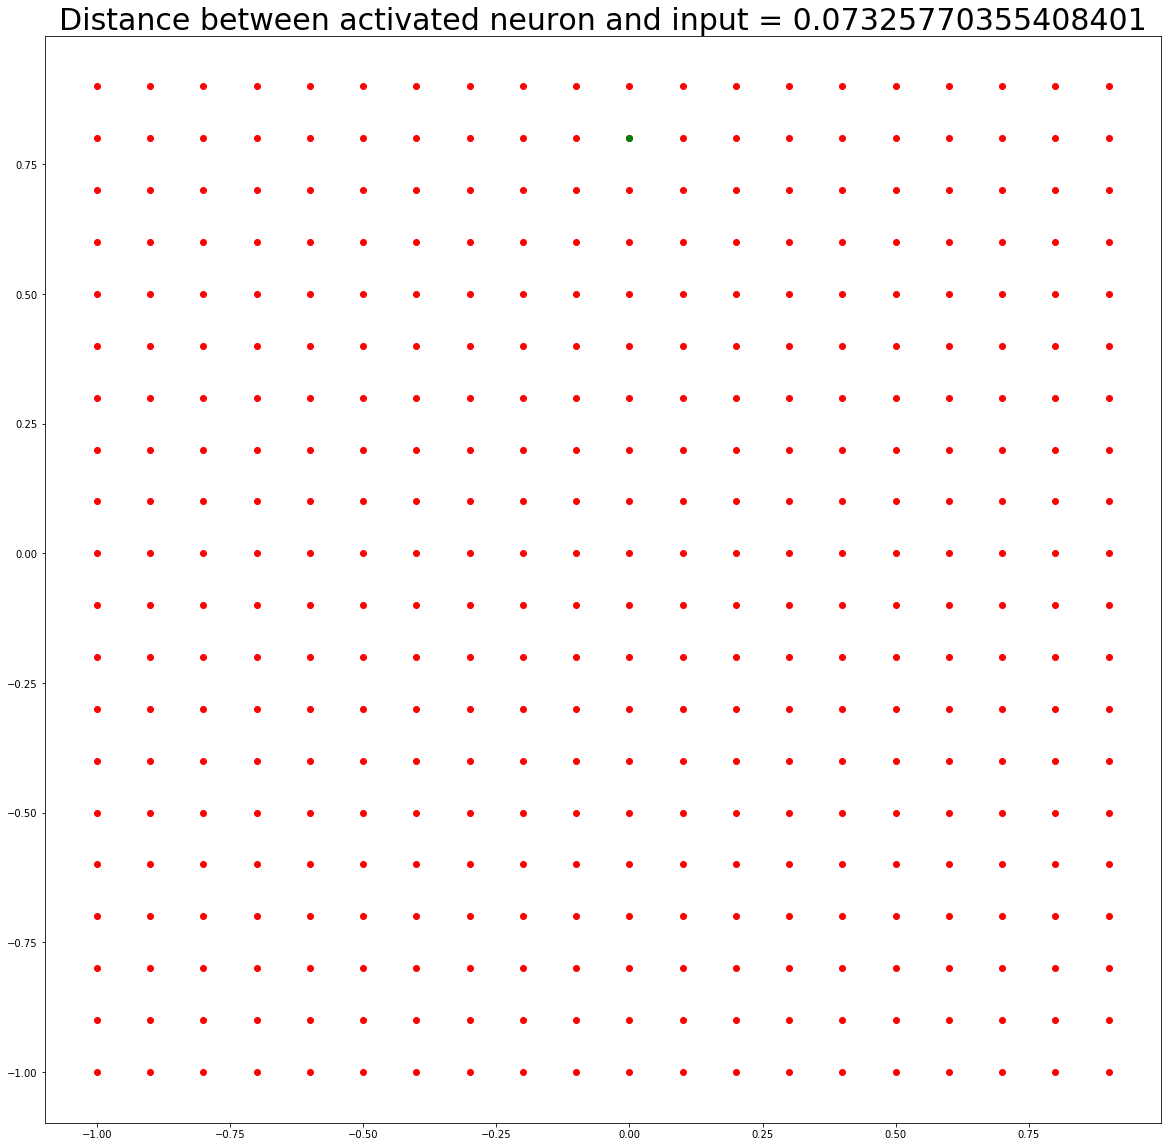

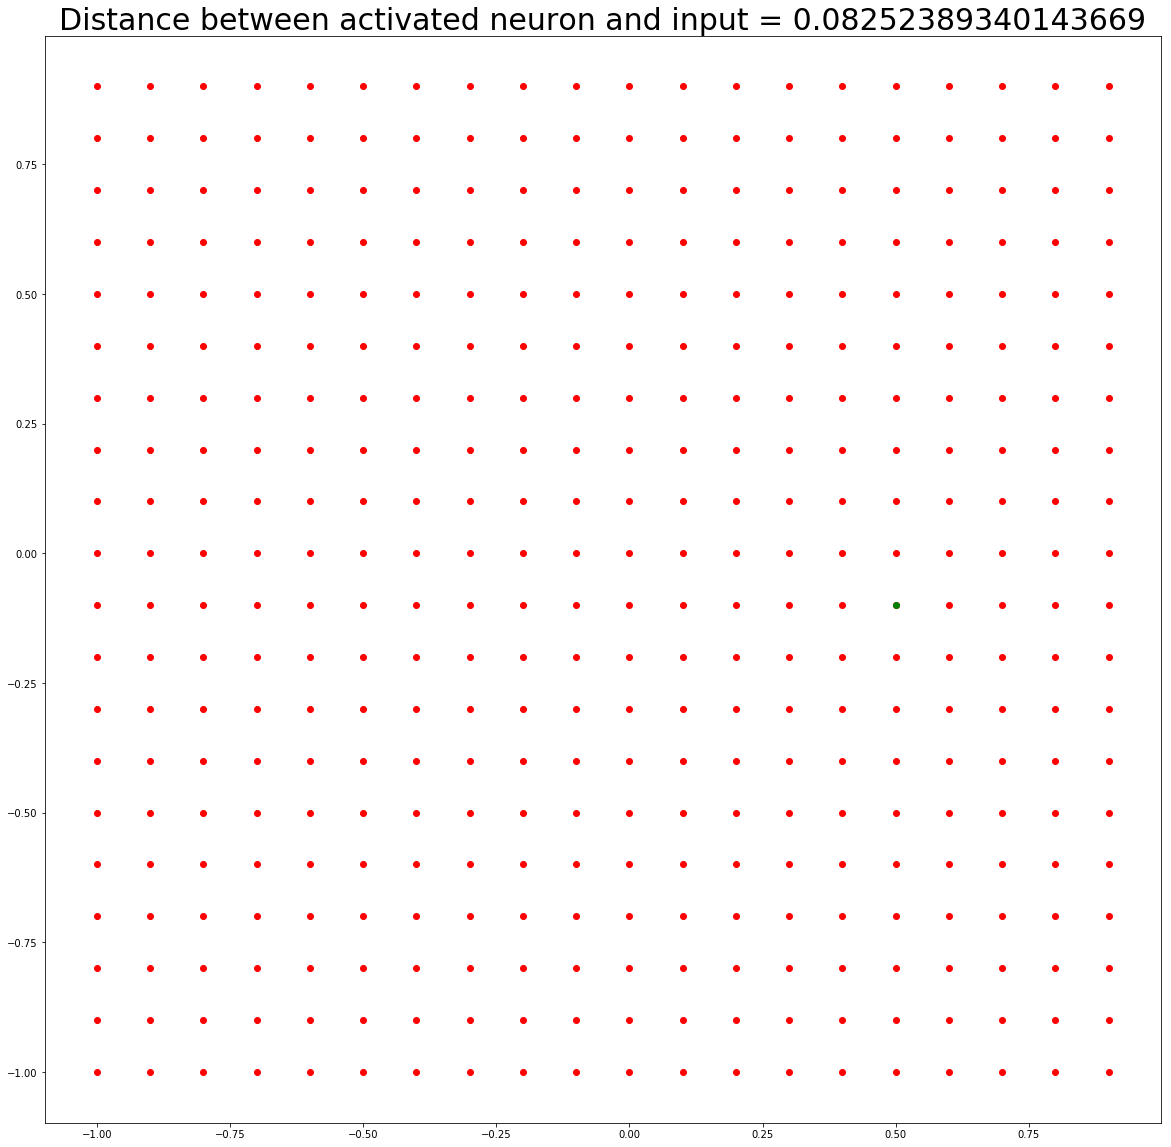

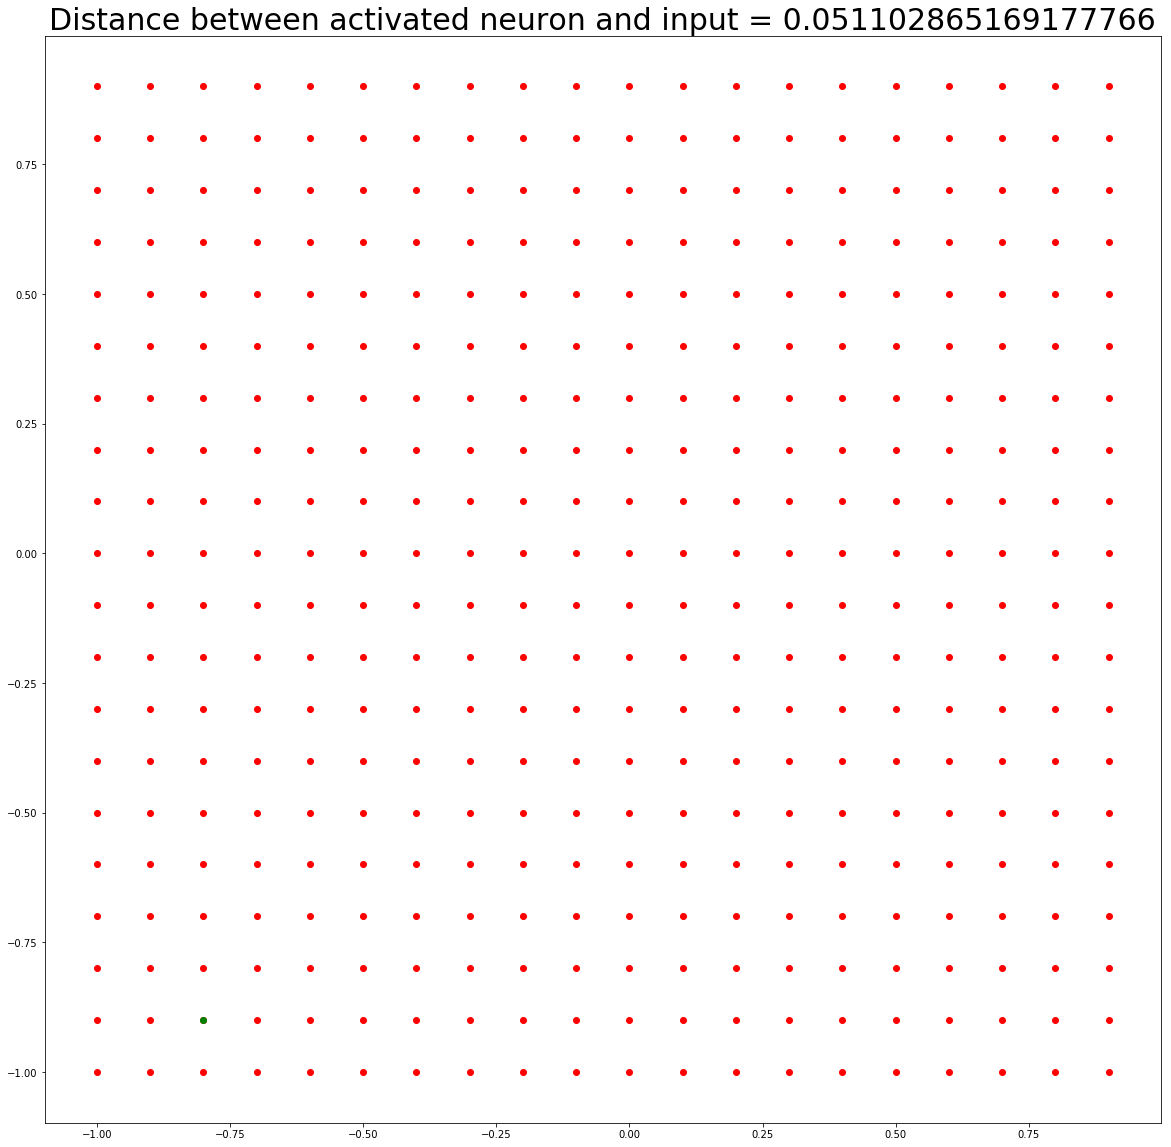

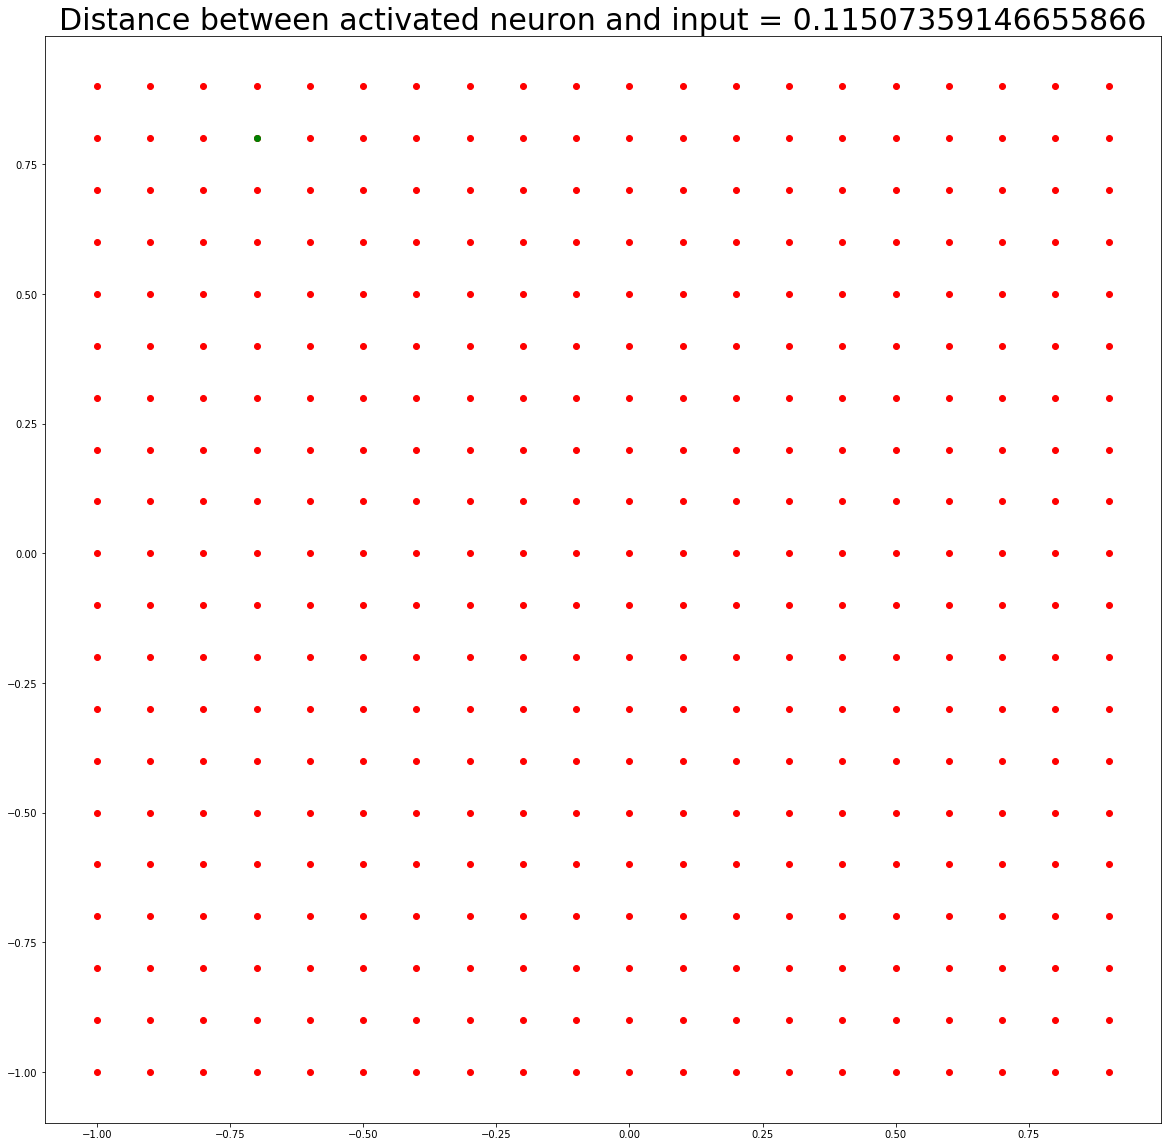

In [10]:
for i in range(test_inputs.shape[0]):
  test_input = test_inputs[i,:]
  win_neuron = get_winner_neuron(test_input)

  plot_x = np.arange(-1, 1, 0.1)
  plot_y = np.arange(-1, 1, 0.1)
  xx, yy = np.meshgrid(plot_x, plot_y)

  coordx, coordy = weights[win_neuron[0]][win_neuron[1]][0], weights[win_neuron[0]][win_neuron[1]][1]
  dist = math.sqrt((coordx-test_input[0])**2 + (coordy - test_input[1])**2)
  coordx = round(coordx, 1)
  coordy = round(coordy, 1)

  plt.figure(figsize=(20,20))
  plt.title("Distance between activated neuron and input = " + str(dist), fontsize = 30)
  plt.scatter(xx, yy, c='r')
  plt.scatter(coordx, coordy, c='g')
  plt.show()
  plt.close()